## Import's

In [1]:
import pandas as pd
import sqlite3

## Подключение к БД

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,pageviews
1,checker
2,deadlines


In [4]:
schema = pd.read_sql("PRAGMA table_info(pageviews);", conn)
schema

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,uid,TEXT,0,None,0
2,2,datetime,TIMESTAMP,0,None,0


## Забираем время пользователя на странице

In [5]:
query = '''
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%'
'''

df = pd.read_sql(query, conn)
df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


## Преобразования и групировка по времени

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['date'] = df['datetime'].dt.date
views_per_day = df.groupby('date').size().reset_index(name='views')

In [8]:
views_per_day

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


## Построение графика

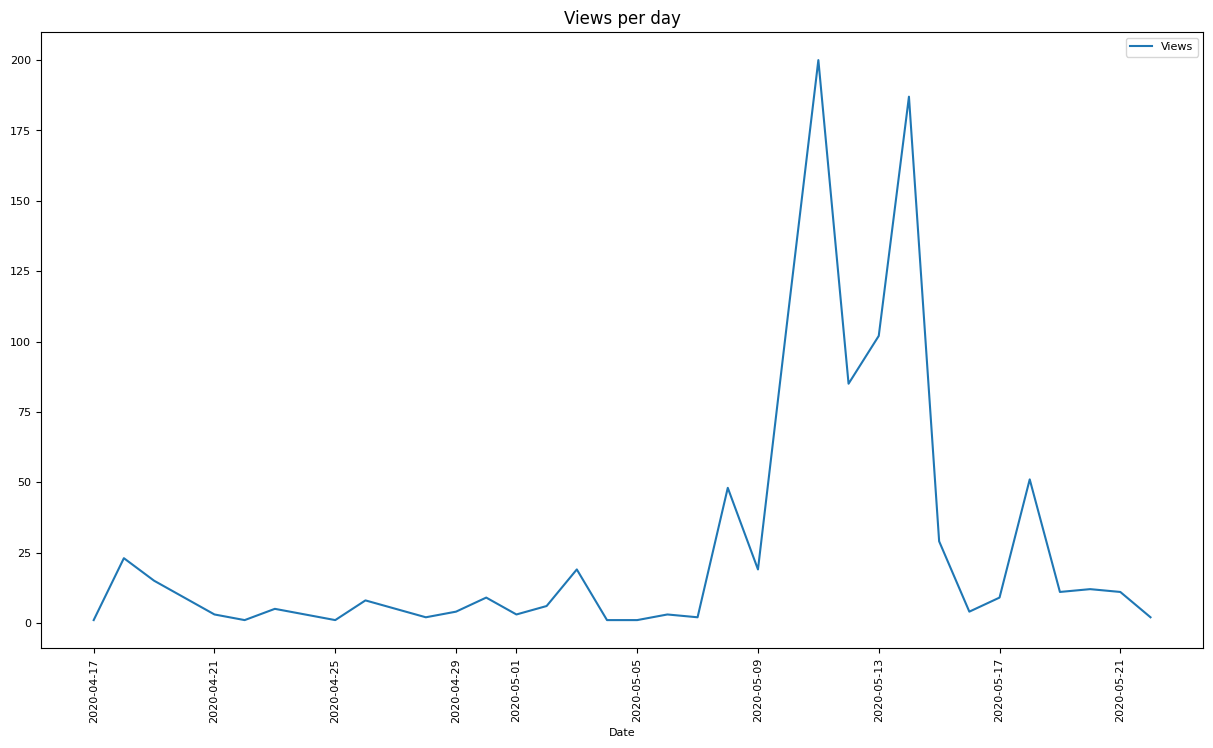

In [7]:
ax = views_per_day.plot(
    x='date',
    y='views',
    figsize=(15, 8),
    fontsize=8,
    legend=True,
    grid=False,
    title='Views per day'
)

ax.set_xlabel('Date', fontsize=8)
ax.legend(['Views'], loc='upper right', fontsize=8)
ax.tick_params(axis='x', rotation=90)

## Закрываем соединение с БД

In [9]:
conn.close()